![Image of Cms Detector](cms.png)
 
<p style="margin-right:8%; margin-left:8%; font-size:28px; font-weight: 200; line-height: 1.5em">
**Thrid Part: How to do an Analysis in Particle Physics?**

## Example 3: Fitting the Z mass peak
This last example is also divided in two parts: 

* Find out the invariant mass of the two pair mu+ mu- of candidates 
* Do a statistical analysis of the results ( Z mass, width,...).

(All code you are going to need is provided in Analyzer_Package, so you can access it as many times as you need and check in it your questions.)   

Once the histogram for the mass was created in the second part, we have implemented two different functions for fitting the Z mass peak. These functions are: 

* Gaussian:

$$ G(x;\mu,\sigma) = \dfrac{1}{\sqrt{2\pi}\sigma}\exp[-\dfrac{(x-\mu)^{2}}{2\sigma^{2}}]    $$

* Relativistic Breit-Wigner:

$$ B(m;M,\Gamma)= N * \dfrac{2}{\pi}*\dfrac{\Gamma^{2}M^{2}}{(m^{2}-M^{2})^{2} + m^{4}(\Gamma^{2}/M^{2})}   $$

To fit a generator-level Z peak a Breit-Wigner fit makes sense. However, reconstructed-level Z peaks have many detector resolutions that smear the Z mass peak. If the detector resolution is relatively poor, then it is usually good enough to fit a gaussian (since the gaussian detector resolution will overwhelm the inherent Briet-Wigner shape of the peak). If the detector resolution is fairly good, then another option is to fit a Breit-Wigner (for the inherent shape) convoluted with a gaussian (to describe the detector effects).This is in the "no-background" case. If you have backgrounds in your sample (Drell-Yan, cosmics, etc...), and you want to do the fit over a large mass range, then another function needs to be included to take care of this - an exponential is commonly used. 

In this exercise, we just use a function, created in the Histos.py script, which fits, automatically, the mass. 
 
**NOTE:** 

For each exercise, to run the code is necessary import **ROOT**.


In [1]:
# Import ROOT
import ROOT

Welcome to ROOTaaS 6.06/00


In [2]:
cd /home/jupyter/CmsOpenData/AnalysisDesigner

/home/jupyter/CmsOpenData/AnalysisDesigner


* ## Gaussian Fit

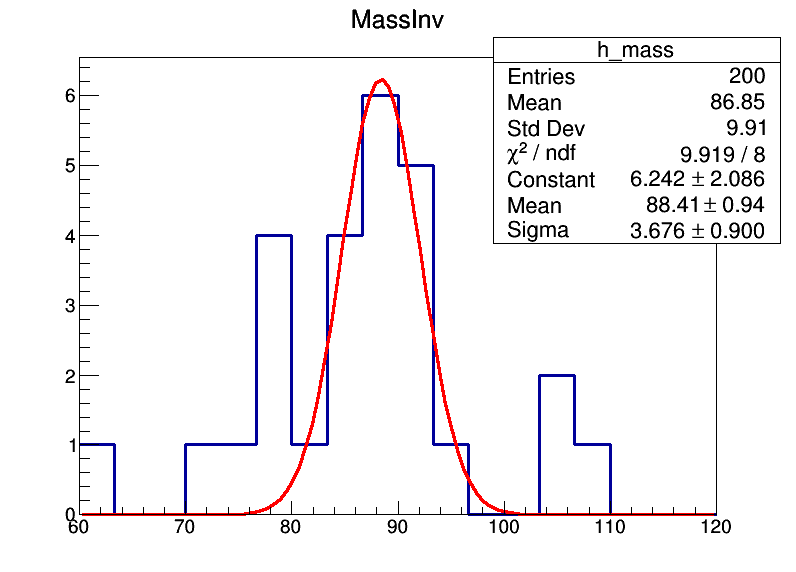

 FCN=9.91939 FROM MIGRAD    STATUS=CONVERGED     118 CALLS         119 TOTAL
                     EDM=8.11923e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.24225e+00   2.08558e+00   2.43466e-03   1.20717e-04
   2  Mean         8.84125e+01   9.44362e-01   1.48854e-03   3.83755e-04
   3  Sigma        3.67564e+00   8.99634e-01   5.57548e-05   4.79000e-03


In [3]:
# Get the root file that contains the histograms for selected muons: goodHistos.root.
Gfile = ROOT.TFile("datafiles/goodhistos.root", "read")
### Then create again a new the canvas where the histograms are going to be drawn
canvas = ROOT.TCanvas("myCanvas","All muons: Pt",800,600)

gHisto=Gfile.Get('h_mass')
gHisto.GetXaxis().SetRangeUser(60, 120)
gHisto.Fit("gaus")
#self.fit1 = self.gHisto.GetFunction("gaus")
from ROOT import gStyle
gStyle.SetOptFit()
gHisto.Draw()
canvas.Draw()

* ## Breit Wigner

In [4]:
# Breit-Wigner function
def mybw(x, par):
    arg1 = 14.0/22.0 # 2 over pi
    arg2 = par[1]*par[1]*par[2]*par[2] #Gamma=par[1]  M=par[2] 
    arg3 = ((x[0]*x[0]) - (par[2]*par[2]))*((x[0]*x[0]) - (par[2]*par[2]))
    arg4 = x[0]*x[0]*x[0]*x[0]*((par[1]*par[1])/(par[2]*par[2]))
    return par[0]*arg1*arg2/(arg3 + arg4)

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: myCanvas


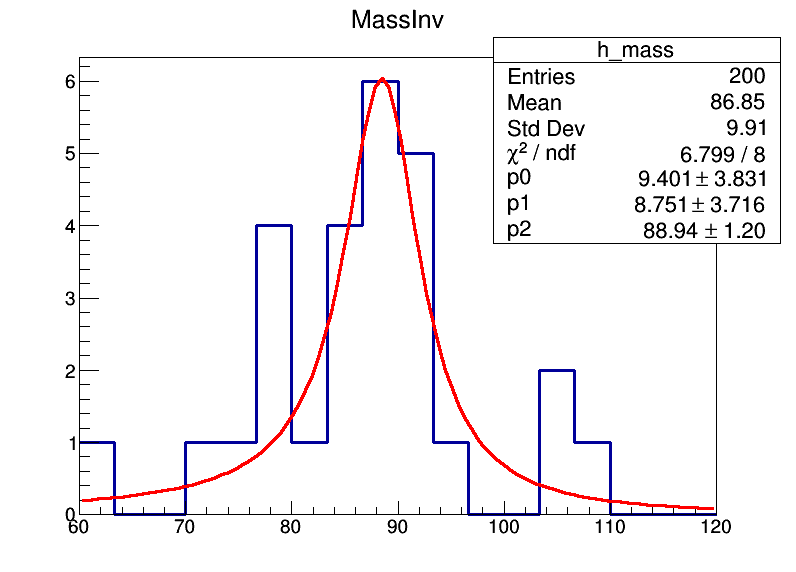

In [5]:
gHisto=Gfile.Get('h_mass')

### Then create again a new the canvas where the histograms are going to be drawn
canvas = ROOT.TCanvas("myCanvas","All muons: Pt",800,600)
gHisto.Draw()
gHisto.GetXaxis().SetRangeUser(60, 120)
division = gHisto.GetNbinsX()
massMIN = gHisto.GetBinLowEdge(1)
massMAX = gHisto.GetBinLowEdge(division+1)
BIN_SIZE = gHisto.GetBinWidth(1)

from ROOT import gStyle, TF1
# Create a TF1 object for calling function mybw 
func = TF1("mybw",mybw,massMIN, massMAX,3)

# Set parameter start values for the function
func.SetParameter(0, 1)
func.SetParameter(2, 5)
func.SetParameter(1, 95)

gHisto.Fit("mybw","QR")

gStyle.SetOptFit()
func.Draw("same")

canvas.Draw()